## Student Performance Analysis

### Objective
The objective of this project is to analyze how attendance, grades, and consistency affect overall academic performance.

### Dataset
The dataset contains student academic records including attendance percentage, grades, and performance indicators.

### Tools Used
- Python
- Pandas, NumPy
- Matplotlib, Seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

DATA LOADING & BASIC INSPECTION

The dataset was loaded from the UCI Student Performance dataset.
Initial inspection was performed to understand the number of students, features, and data types before proceeding with analysis.

In [2]:
df = pd.read_csv('../data/student-mat.csv', sep=';')


In [3]:
df.shape

(395, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Feature Categories

- Academic features: G1, G2, G3, failures
- Behavioral features: studytime, absences, goout, freetime
- Contextual features: family support, internet access, parental education


In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
df.duplicated().sum()


np.int64(0)

No missing value and dublicates found in the dataset 

## Feature Engineering
New features were derived to better capture overall performance, learning progression, and attendance behavior. These features enable more meaningful analysis than raw grade values alone.

In [9]:
df["total_grade"] = df["G1"] + df["G2"] + df["G3"]
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,44
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,26


In [10]:
df["improvement"] = df["G3"] - df["G1"]
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,total_grade,improvement
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,17,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,16,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,25,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,44,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,26,4


## Attendance Level Feature
Attendance level was derived from the number of absences.
Lower absence counts correspond to higher attendance levels, allowing attendance behavior to be analyzed in grouped form rather than as raw counts.

In [11]:
#Create attendance level
if 'attendance_level' not in df.columns:
    conditions = [
        (df['absences'] <= 5),
        (df['absences'] > 5) & (df['absences'] <= 15),
        (df['absences'] > 15)
    ]
    choices = ['High', 'Medium', 'Low']
    df['attendance_level'] = np.select(conditions, choices, default='Unknown')


In [12]:
df['attendance_level'].value_counts()


attendance_level
High      249
Medium    113
Low        33
Name: count, dtype: int64

## Grade Distribution Analysis


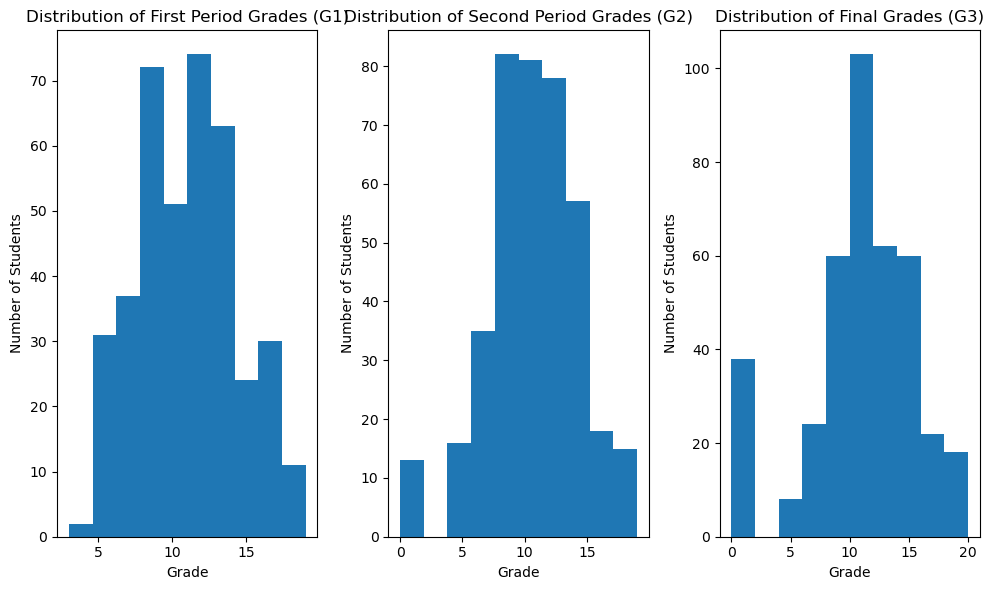

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.hist(df['G1'], bins=10)
plt.title('Distribution of First Period Grades (G1)')
plt.xlabel('Grade')
plt.ylabel('Number of Students')

plt.subplot(1,3,2)
plt.hist(df['G2'], bins=10)
plt.title('Distribution of Second Period Grades (G2)')
plt.xlabel('Grade')
plt.ylabel('Number of Students')

plt.subplot(1,3,3)
plt.hist(df['G3'], bins=10)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Number of Students')


plt.tight_layout()
plt.show()


The distributions of G1, G2, and G3 show how student performance evolves across the academic term. 
While the overall spread of grades remains similar, there is a noticeable shift in the distribution from G1 to G3. 
Some students show improvement over time, while others experience a decline, indicating that early performance does not always fully determine final outcomes.

Lower grades appear more frequently in the final assessment compared to the first period, suggesting that maintaining performance throughout the term may be challenging for a subset of students.
Overall, the distributions highlight variation in student trajectories rather than uniform performance trends.


## Performance Consistency Analysis


In [14]:
def performance_trend(improvement):
    if improvement > 2:
        return "Improving"
    elif improvement < -2:
        return "Declining"
    else:
        return "Consistent"

df["performance_trend"] = df["improvement"].apply(performance_trend)
df["performance_trend"].value_counts()

performance_trend
Consistent    321
Declining      47
Improving      27
Name: count, dtype: int64

Students were categorized into improving, consistent, and declining groups based on the change between their first (G1) and final (G3) grades. 
The majority of students fall into the consistent performance category, indicating that most students maintain a relatively stable level of performance throughout the term.

A smaller proportion of students demonstrate significant improvement or decline. 
This suggests that large performance shifts are less common and that gradual changes, rather than dramatic improvements, characterize most learning trajectories.
These findings highlight the importance of consistency over time rather than relying solely on early or late performance indicators.


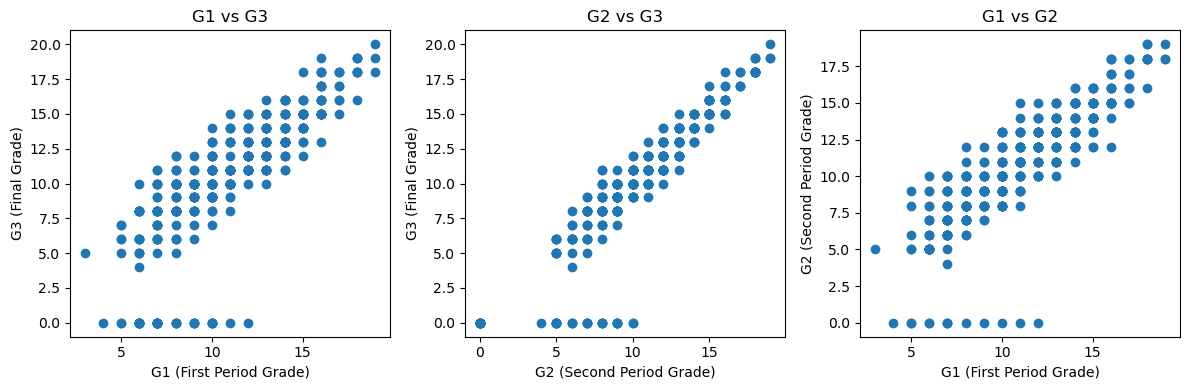

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.scatter(df['G1'], df['G3'])
plt.xlabel('G1 (First Period Grade)')
plt.ylabel('G3 (Final Grade)')
plt.title('G1 vs G3')

plt.subplot(1,3,2)
plt.scatter(df['G2'], df['G3'])
plt.xlabel('G2 (Second Period Grade)')
plt.ylabel('G3 (Final Grade)')
plt.title('G2 vs G3')

plt.subplot(1,3,3)
plt.scatter(df['G1'], df['G2'])
plt.xlabel('G1 (First Period Grade)')
plt.ylabel('G2 (Second Period Grade)')
plt.title('G1 vs G2')

plt.tight_layout()
plt.show()


Internal assessments show a strong positive relationship with final performance, particularly in the second period. However, noticeable variability and mismatch cases indicate that internal grades are not perfectly reliable predictors of final outcomes and may fail to capture late improvements or performance declines.

In [16]:
df[['G1', 'G2', 'G3']].corr()


,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


## Internal vs Final Assessment Reliability


The relationship between internal assessments and final grades shows a generally positive association, particularly between G2 and G3. 
However, the scatter plots reveal noticeable variability, indicating that internal grades are not perfectly reliable predictors of final outcomes.

Several students with strong internal performance perform poorly in the final assessment, while some students with weak internals demonstrate significant improvement by the end of the term.
These mismatch cases highlight that internal assessments capture only part of the learning trajectory and may fail to reflect late improvements, external factors, or changes in student engagement.
This suggests that relying solely on early or mid-term evaluations can be misleading when assessing overall academic performance.
